In [28]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

###Problem 1.

Generate a random $n\times n$ matrix $A$ and a random $n$-vector $x_{\text{true}}$ for $n=2^3,\ldots,2^{10}$.
For each $n$, define $y = Ax_{\text{true}}$ and compare runtimes in solving for $x$ in linear system $$Ax = y$$ using LU, QR, eigendecomposition, SVD, and built-in linear system solver `np.linalg.solve`.  Which method is the fastest?

In [46]:
n = 1000
A = np.random.randn(n, n)
x = np.random.rand(n)
y = A @ x
P, L, U = sp.linalg.lu(A)

In [48]:
z = solve_triangular(L, P.T @ y, lower=True)  # forward substitution
x_lu = solve_triangular(U, z, lower=False)    # backward substitution

def solve_lu(A, y):
  ''' solves Ax = y using LU factorization '''
  P, L, U = sp.linalg.lu(A)
  z = solve_triangular(L, P.T @ y, lower=True)
  x = solve_triangular(U, z, lower=False)
  return x

def solve_qr(A, y):
  ''' solves least squares problem ||Ax - y|| using QR factorization '''
  Q, R = sp.linalg.qr(A, mode='economic')
  z = Q.T @ y
  x = solve_triangular(R, z, lower=False)
  return x

def solve_eig(A, y):
  ''' solves Ax = y using eigenvalue decomposition with eig '''
  Lam, U = sp.linalg.eig(A)
  x = U @ np.diag(1/Lam) @ U.T @ y
  return x

def solve_svd(A, y):
  ''' solves Ax = y using SVD '''
  U, S, Vh = sp.linalg.svd(A, full_matrices = False)
  x = Vh.T @ np.diag(1/S) @ U.T @ y
  return x


k = 8
size = [2**(i+3) for i in range(k)]
print(size)

[8, 16, 32, 64, 128, 256, 512, 1024]


In [40]:
time_lu = np.zeros(k)
time_qr = np.zeros(k)
time_eig = np.zeros(k)
time_svd = np.zeros(k)
time_solve = np.zeros(k)

k = 8
size = [2**(i+3) for i in range(k)]
print(size)

for i in range(k):
  n = [i]
  A = np.random.randn(n,n)
  x = np.random.randn(n)
  y = A @ x

  t_start = time.time()
  x = solve_lu(A,y)
  t_end = time.time()
  time_lu[i] = t_end - t_start

  t_start = time.time()
  x = solve_qr(A,y)
  t_end = time.time()
  time_qr[i] = t_end - t_start

  t_start = time.time()
  x = solve_eig(A,y)
  t_end = time.time()
  time_eig[i] = t_end - t_start

  t_start = time.time()
  x = solve_svd(A,y)
  t_end = time.time()
  time_svd[i] = t_end - t_start

  t_start = time.time()
  x = np.linalg.solve(A,y)
  t_end = time.time()
  time_solve[i] = t_end - t_start



[8, 16, 32, 64, 128, 256, 512, 1024]


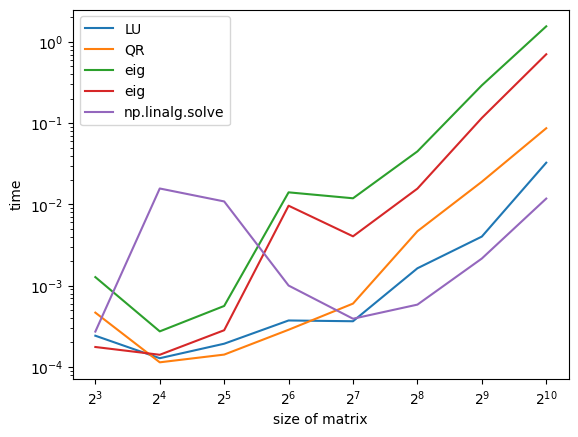

In [50]:
plt.plot(size, time_lu, label ='LU')
plt.plot(size, time_qr, label ='QR')
plt.plot(size, time_eig, label ='eig')
plt.plot(size, time_svd, label ='eig')
plt.plot(size, time_solve, label ='np.linalg.solve')
plt.xscale('log', base=2)
plt.yscale('log', base=10)
plt.xlabel('size of matrix')
plt.ylabel('time')
plt.legend()
plt.show()

###Problem 2

Generate a set of $n=100$ data points $(x_i,y_i)$ for $i=1,\ldots,n$ with
$$ \frac{1}{2} = x_1 < x_2 < \cdots < x_{n-1} < x_{n} = 1$$
$$y_i = a e^{b (x_i+1)} + \delta_i, \quad i=1,2,\ldots,n$$
where $a=b=2$. Assume that $\delta_i$'s are independent and normally distributed with mean $0$ and variance $1$ using `numpy.random.randn(n)`

Although the data points exhibit a nonlinear relationship, we can transform the problem into a linear form by taking the natural logarithm as follows.
$$\ln y = \ln a + b (x+1)$$
This leads to the following linear system
$$\begin{bmatrix}
  1 & x_1+1\\
  1 & x_2+1\\
  \vdots\\
  1 & x_n+1
\end{bmatrix}
\begin{bmatrix}
  \ln a\\
  b
\end{bmatrix}
= \begin{bmatrix}
  \ln y_1\\
  \ln y_2\\
  \vdots\\
  \ln y_n
\end{bmatrix}$$
Determine the best exponential curve that fits the given data points by solving the corresponding linear least squares problem via singular value decomposition. In one figure, plot the true and fitted nonlinear curves with the given data points. Discuss your results.